(EIGVALEIGVEC)=

# 2.2 Eigenvalores y eigenvectores

```{admonition} Notas para contenedor de docker:

Comando de docker para ejecución de la nota de forma local:

nota: cambiar `<ruta a mi directorio>` por la ruta de directorio que se desea mapear a `/datos` dentro del contenedor de docker y `<versión imagen de docker>` por la versión más actualizada que se presenta en la documentación.

`docker run --rm -v <ruta a mi directorio>:/datos --name jupyterlab_optimizacion -p 8888:8888 -d palmoreck/jupyterlab_optimizacion:<versión imagen de docker>`

password para jupyterlab: `qwerty`

Detener el contenedor de docker:

`docker stop jupyterlab_optimizacion`

Documentación de la imagen de docker `palmoreck/jupyterlab_optimizacion:<versión imagen de docker>` en [liga](https://github.com/palmoreck/dockerfiles/tree/master/jupyterlab/optimizacion).

```

---

Nota generada a partir de [liga](https://www.dropbox.com/s/s4ch0ww1687pl76/3.2.2.Factorizaciones_matriciales_SVD_Cholesky_QR.pdf?dl=0).

```{admonition} Al final de esta nota la comunidad lectora:
:class: tip

* Aprenderá las definiciones más relevantes en el tema de eigenvalores y eigenvectores para su uso en el desarrollo de algoritmos en el análisis numérico en la resolución de problemas del álgebra lineal numérica. En específico las definiciones de: diagonalizable o *non defective* y similitud son muy importantes.

* Comprenderá el significado geométrico de calcular los eigenvalores y eigenvectores de una matriz simétrica para una forma cuadrática que define a una elipse.

* Aprenderá cuáles problemas en el cálculo de eigenvalores y eigenvectores de una matriz son bien y mal condicionados.

```

En esta nota **asumimos** que $A \in \mathbb{R}^{n \times n}$.

## Eigenvalor (valor propio o característico)

```{admonition} Definición

El número $\lambda$ (real o complejo) se denomina *eigenvalor* de A si existe $v \in \mathbb{C}^n - \{0\}$ tal que $Av = \lambda v$. El vector $v$ se nombra eigenvector (vector propio o característico) de $A$ correspondiente al eigenvalor $\lambda$.
```

```{admonition} Observación
:class: tip 

Observa que si $Av=\lambda v$ y $v \in \mathbb{C}^n-\{0\}$ entonces la matriz $A-\lambda I_n$ es singular por lo que su determinante es cero.

```

```{admonition} Comentarios

* Una matriz con componentes reales puede tener eigenvalores y eigenvectores con valores en $\mathbb{C}$ o $\mathbb{C}^n$ respectivamente.
* El conjunto de eigenvalores se le nombra **espectro de una matriz** y se denota como:

$$\lambda(A) = \{ \lambda | \det(A-\lambda I_n) = 0\}.$$

* El polinomio 

$$p(z) = \det(A-zI_n) = (-1)^nz^n + a_{n-1}z^{n-1}+ \dots + a_1z + a_0$$

se le nombra **polinomio característico asociado a $A$** y sus raíces o ceros son los eigenvalores de $A$.

* La multiplicación de $A$ por un eigenvector es un reescalamiento y posible cambio de dirección del eigenvector.
* Si consideramos que nuestros espacios vectoriales se definen sobre $\mathbb{C}$ entonces siempre podemos asegurar que $A$ tiene un eigenvalor con eigenvector asociado. En este caso $A$ tiene $n$ eigenvalores y pueden o no repetirse.

* Se puede probar que el determinante de $A$: $\det(A) = \displaystyle \prod_{i=1}^n \lambda_i$ y la traza de $A$: $tr(A) = \displaystyle \sum_{i=1}^n \lambda_i$.
```

### Ejemplo

In [1]:
import numpy as np

In [2]:
np.set_printoptions(precision=3, suppress=True)

In [3]:
A=np.array([[10,-18],[6,-11]])

In [4]:
print(A)

[[ 10 -18]
 [  6 -11]]


**En *NumPy* con el módulo [numpy.linalg.eig](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html) podemos obtener eigenvalores y eigenvectores** 

In [5]:
evalue, evector = np.linalg.eig(A)

In [6]:
print('eigenvalores:')
print(evalue)
print('eigenvectores:')
print(evector)

eigenvalores:
[ 1. -2.]
eigenvectores:
[[0.894 0.832]
 [0.447 0.555]]


```{margin}

$Av_1 = \lambda_1 v_1$.
```

In [7]:
print('matriz * eigenvector:')
print(A@evector[:,0])
print('eigenvalor * eigenvector:')
print(evalue[0]*evector[:,0])

matriz * eigenvector:
[0.894 0.447]
eigenvalor * eigenvector:
[0.894 0.447]


```{margin}

$Av_2 = \lambda_2 v_2$.
```

In [8]:
print('matriz * eigenvector:')
print(A@evector[:,1])
print('eigenvalor * eigenvector:')
print(evalue[1]*evector[:,1])

matriz * eigenvector:
[-1.664 -1.109]
eigenvalor * eigenvector:
[-1.664 -1.109]


### Ejemplo 

Si $v$ es un eigenvector entonces $cv$ es eigenvector donde: $c$ es una constante distinta de cero.


In [9]:
const = -2
const_evector = const*evector[:,0]
print(const_evector)

[-1.789 -0.894]


```{margin}

$cv$ es un eigenvector con eigenvalor asociado $\lambda$ pues $A(cv) = \lambda(cv)$ se satisface si $Av = \lambda v$ y $c \neq 0$.

```

In [10]:
print('matriz * (constante * eigenvector):')
print(A@const_evector)
print('eigenvalor * (constante * eigenvector):')
print(evalue[0]*const_evector)

matriz * (constante * eigenvector):
[-1.789 -0.894]
eigenvalor * (constante * eigenvector):
[-1.789 -0.894]


### Ejemplo 

Una matriz con entradas reales puede tener eigenvalores y eigenvectores complejos:

In [11]:
A=np.array([[3,-5],[1,-1]])

In [12]:
print(A)

[[ 3 -5]
 [ 1 -1]]


In [13]:
evalue, evector = np.linalg.eig(A)

```{margin}

Para $A \in \mathbb{R}^{n \times n}$ se tiene: $\lambda \in \mathbb{C}$ es eigenvalor de $A$ si y sólo si $\bar{\lambda} \in \mathbb{C}$ es eigenvalor de $A$ con $\bar{\lambda}$ el conjugado de $\lambda$.

```

In [14]:
print('eigenvalores:')
print(evalue)
print('eigenvectores:')
print(evector)

eigenvalores:
[1.+1.j 1.-1.j]
eigenvectores:
[[0.913+0.j    0.913-0.j   ]
 [0.365-0.183j 0.365+0.183j]]


```{admonition} Observación
:class: tip

En el ejemplo anterior cada eigenvalor tiene una multiplicidad simple y la multiplicidad geométrica de cada eigenvalor es $1$.

```

### Ejemplo

Los eigenvalores de una matriz diagonal son iguales a su diagonal y sus eigenvectores son los vectores canónicos $e_1, e_2, \dots e_n$.

In [15]:
A = np.diag([2, 2, 2, 2])

In [16]:
print(A)

[[2 0 0 0]
 [0 2 0 0]
 [0 0 2 0]
 [0 0 0 2]]


In [17]:
evalue, evector = np.linalg.eig(A)

In [18]:
print('eigenvalores:')
print(evalue)
print('eigenvectores:')
print(evector)

eigenvalores:
[2. 2. 2. 2.]
eigenvectores:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


```{admonition} Definición

La **multiplicidad algebraica** de un eigenvalor es su multiplicidad considerado como raíz/cero del polinomio característico $p(z)$. Si no se repite entonces tal eigenvalor se le nombra de multiplicidad **simple**.

La **multiplicidad geométrica** de un eigenvalor es el número máximo de eigenvectores linealmente independientes asociados a éste.

```

### Ejemplo

Los eigenvalores de una matriz triangular son iguales a su diagonal.

In [19]:
A=np.array([[10,0, -1],
            [6,10, 10],
            [3, 4, 11.0]])
A = np.triu(A)

In [20]:
print(A)

[[10.  0. -1.]
 [ 0. 10. 10.]
 [ 0.  0. 11.]]


In [21]:
evalue, evector = np.linalg.eig(A)

```{margin}

Observa que el eigenvalor igual a $10$ está repetido dos veces (multiplicidad algebraica igual a $2$) y se tienen dos eigenvectores linealmente independientes asociados a éste (multiplicidad geométrica igual a $2$). 
```

In [22]:
print('eigenvalores:')
print(evalue)
print('eigenvectores:')
print(evector)

eigenvalores:
[10. 10. 11.]
eigenvectores:
[[ 1.     0.    -0.099]
 [ 0.     1.     0.99 ]
 [ 0.     0.     0.099]]


**Otro ejemplo:**

In [23]:
A=np.array([[10,18, -1],
            [6,10, 10],
            [3, 4, 11.0]])
A = np.triu(A)

In [24]:
print(A)

[[10. 18. -1.]
 [ 0. 10. 10.]
 [ 0.  0. 11.]]


In [25]:
evalue, evector = np.linalg.eig(A)

```{margin}

Observa que en este ejemplo el eigenvalor $10$ está repetido dos veces (multiplicidad algebraica es igual a $2$) y sus eigenvectores asociados son linealmente dependientes (multiplicidad geométrica es igual a $1$).
```

In [26]:
print('eigenvalores:')
print(evalue)
print('eigenvectores:')
print(evector)

eigenvalores:
[10. 10. 11.]
eigenvectores:
[[ 1.    -1.     0.998]
 [ 0.     0.     0.056]
 [ 0.     0.     0.006]]


### Ejemplo

Un eigenvalor puede estar repetido y tener un sólo eigenvector linealmente independiente: 

In [27]:
A = np.array([[2, 1, 0],
              [0, 2, 1],
              [0, 0, 2]])

In [28]:
evalue, evector = np.linalg.eig(A)

```{margin}

Observa que en este ejemplo el eigenvalor $2$ está repetido tres veces (multiplicidad algebraica es igual a $3$) y sus eigenvectores asociados son linealmente dependientes (multiplicidad geométrica es igual a $1$).
```

In [29]:
print('eigenvalores:')
print(evalue)
print('eigenvectores:')
print(evector)

eigenvalores:
[2. 2. 2.]
eigenvectores:
[[ 1. -1.  1.]
 [ 0.  0. -0.]
 [ 0.  0.  0.]]


```{admonition} Definición

Si $(\lambda, v)$ es una pareja de eigenvalor-eigenvector de $A$ tales que $Av = \lambda v$ entonces $v$ se le nombra eigenvector derecho. Si $(\lambda, v)$ es una pareja de eigenvalor-eigenvector de $A^T$ tales que $A^Tv = \lambda v$ (que es equivalente a $v^TA=\lambda v^T$) entonces $v$ se le nombra eigenvector izquierdo.
```

```{admonition} Observaciones
:class: tip

* En todos los ejemplos anteriores se calcularon eigenvectores derechos.

* Los eigenvectores izquierdos y derechos para una matriz simétrica son iguales.

```

(DIAGONALIZABLE)=

## $A$ diagonalizable

```{admonition} Definición

Si $A$ tiene $n$ eigenvectores linealmente independientes entonces $A$ se nombra diagonalizable o *non defective*. En este caso si $x_1, x_2, \dots, x_n$ son eigenvectores de $A$ con $Ax_i = \lambda_i x_i$ para $i=1,\dots,n$ entonces la igualdad anterior se escribe en ecuación matricial como:

$$AX = X \Lambda$$

o bien:

$$A = X \Lambda X^{-1}$$

donde: $X$ tiene por columnas los eigenvectores de $A$ y $\Lambda$ tiene en su diagonal los eigenvalores de $A$.

A la descomposición anterior $A = X \Lambda X^{-1}$ para $A$ diagonalizable o *non defective* se le nombra ***eigen decomposition***.
```

```{admonition} Observación
:class: tip

* Si $A = X \Lambda X^{-1}$ entonces $X^{-1}A = \Lambda X^{-1}$ y los renglones de $X^{-1}$ (o equivalentemente las columnas de $X^{-T}$) son eigenvectores izquierdos.

* Si $A = X \Lambda X^{-1}$ y $b = Ax = (X \Lambda X^{-1}) x$ entonces:

$$\tilde{b} = X^{-1}b = X^{-1}  (Ax) = X^{-1} (X \Lambda X^{-1}) x = \Lambda X^{-1}x = \Lambda \tilde{x}.$$

Lo anterior indica que el producto matricial $Ax$ para $A$ diagonalizable es equivalente a multiplicar una matriz diagonal por un vector denotado como $\tilde{x}$ que contiene los coeficientes de la combinación lineal de las columnas de $X$ para el vector $x$ . El resultado de tal multiplicación es un vector denotado como $\tilde{b}$ que también contiene los coeficientes de la combinación lineal de las columnas de $X$ para el vector $b$. En resúmen, si $A$ es diagonalizable o *non defective* la multiplicación $Ax$ es equivalente a la multiplicación por una matriz diagonal $\Lambda \tilde{x}$ (salvo un cambio de bases, ver [Change of basis](https://en.wikipedia.org/wiki/Change_of_basis)).

* Si una matriz $A$ tiene eigenvalores distintos entonces es diagonalizable y más general: si $A$ tiene una multiplicidad geométrica igual a su multiplicidad algebraica de cada eigenvalor entonces es diagonalizable. 

```

### Ejemplo

La matriz:

$$A = \left[
\begin{array}{ccc}
1 & -4 & -4\\
8 & -11 & -8\\
-8 & 8 & 5
\end{array}
\right]
$$

es diagonalizable.

In [30]:
A = np.array([[1, -4, -4],
              [8, -11, -8],
              [-8, 8, 5.0]])

In [31]:
print(A)

[[  1.  -4.  -4.]
 [  8. -11.  -8.]
 [ -8.   8.   5.]]


In [32]:
evalue, evector = np.linalg.eig(A)

In [33]:
print('eigenvalores:')
print(evalue)

eigenvalores:
[ 1. -3. -3.]


```{margin}

Se verifica que los eigenvectores de este ejemplo es un conjunto linealmente independiente por lo que $A=X\Lambda X^{-1}$.

```

In [34]:
print('eigenvectores:')
print(evector)

eigenvectores:
[[ 0.333 -0.717 -0.241]
 [ 0.667 -0.02  -0.796]
 [-0.667 -0.697  0.555]]


In [35]:
X = evector
Lambda = np.diag(evalue)

In [36]:
print(X@Lambda@np.linalg.inv(X))

[[  1.  -4.  -4.]
 [  8. -11.  -8.]
 [ -8.   8.   5.]]


In [37]:
print(A)

[[  1.  -4.  -4.]
 [  8. -11.  -8.]
 [ -8.   8.   5.]]


$A$ es diagonalizable pues: $X^{-1} A X = \Lambda$

In [38]:
print(np.linalg.inv(X)@A@X)

[[ 1.  0. -0.]
 [-0. -3. -0.]
 [ 0. -0. -3.]]


In [39]:
print(Lambda)

[[ 1.  0.  0.]
 [ 0. -3.  0.]
 [ 0.  0. -3.]]


```{admonition} Comentario

Normalmente en el cálculo numérico no se calcula la inversa de una matriz con `np.linalg.inv(X)`. Sólo se utiliza en estos casos para mostrar la igualdad.

```

```{admonition} Observación
:class: tip

Observa que **no necesariamente** $X$ en la *eigen decomposition* es una matriz ortogonal.

```

```{margin}

Aquí se toma $X[1:3,1]$ como la primera columna de $X$ y se satisface $X[1:3,1]^TX[1:3,1] = 1$ en este ejemplo pero en general esto no se cumple.

```

In [40]:
X[:,0].dot(X[:,0])

1.0

```{margin}

$X[1:3,1]^TX[1:3,2] \neq 0$ por lo que la primera y segunda columna de $X$ no son ortogonales.

```

In [41]:
X[:,0].dot(X[:,1])

0.21173662840081775

**Eigenvectores derechos:**

```{margin}

`x_1` es la primer columna de $X$: $X[1:3, 1]$ y `lambda_1` el eigenvalor asociado.
```

In [42]:
x_1 = X[:,0]
lambda_1 = Lambda[0,0]

In [43]:
print(A@x_1)

[ 0.333  0.667 -0.667]


```{margin}

$Ax_1 = \lambda_1 x_1$.
```

In [44]:
print(lambda_1*x_1)

[ 0.333  0.667 -0.667]


```{margin}

`x_2` es la segunda columna de $X$: $X[1:3, 2]$ y `lambda_2` el eigenvalor asociado.
```

In [45]:
x_2 = X[:,1]
lambda_2 = Lambda[1,1]

In [46]:
print(A@x_2)

[2.151 0.061 2.09 ]


```{margin}

$Ax_2 = \lambda_2 x_2$.
```

In [47]:
print(lambda_2*x_2)

[2.151 0.061 2.09 ]


**Eigenvectores izquierdos:**

```{admonition} Observación
:class: tip

Para los eigenvectores izquierdos se deben tomar los renglones de $X^{-1}$ (o equivalentemente las columnas de $X^{-T}$) sin embargo no se utiliza el método [inv](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html) de *NumPy* pues es más costoso computacionalmente y amplifica los errores por redondeo. En su lugar se utiliza el método [solve](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html) y se resuelve el sistema: $X^{T} z  = e_i$ para $e_i$ $i$-ésimo vector canónico.

```

In [48]:
e1 = np.zeros((X.shape[0],1))

In [49]:
e1[0] = 1

In [50]:
print(e1)

[[1.]
 [0.]
 [0.]]


```{margin}

`x_inv_1` es el primer renglón de $X^{-1}$: $X^{-1}[1, 1:3]$.
```

In [51]:
x_inv_1 = np.linalg.solve(X.T, e1)

In [52]:
print(x_inv_1)

[[ 3.]
 [-3.]
 [-3.]]


In [53]:
print(A.T@x_inv_1)

[[ 3.]
 [-3.]
 [-3.]]


```{margin}

$A^TX^{-T}[1:3,1] = \lambda_1 X^{-T}[1:3,1]$, `lambda_1` el eigenvalor asociado a `x_inv_1`.
```

In [54]:
print(lambda_1*x_inv_1)

[[ 3.]
 [-3.]
 [-3.]]


In [55]:
e2 = np.zeros((X.shape[0],1))

In [56]:
e2[1] = 1

```{margin}

`x_inv_2` es el segundo renglón de $X^{-1}$: $X^{-1}[2, 1:3]$.
```

In [57]:
x_inv_2 = np.linalg.solve(X.T, e2)

In [58]:
print(x_inv_2)

[[-0.851]
 [-0.13 ]
 [-0.556]]


In [59]:
print(A.T@x_inv_2)

[[2.552]
 [0.391]
 [1.667]]


```{margin}

$A^TX^{-T}[1:3,2] = \lambda_2 X^{-T}[1:3,2]$, `lambda_2` el eigenvalor asociado a `x_inv_2`.
```

In [60]:
print(lambda_2*x_inv_2)

[[2.552]
 [0.391]
 [1.667]]


```{admonition} Ejercicio
:class: tip

Utilizando lenguajes de programación responde ¿es la siguiente matriz diagonalizable?

$$A = \left [
\begin{array}{ccc}
-1 & -1 & -2\\
8 & -11 & -8\\
-10 & 11 & 7
\end{array}
\right]
$$

si es así encuentra su *eigen decomposition* y diagonaliza a $A$.
```

(DESCESP)=

### Resultado: $A$ simétrica

Si A es simétrica entonces tiene eigenvalores reales. Aún más: $A$ tiene eigenvectores reales linealmente independientes, forman un conjunto ortonormal y se escribe como un producto de tres matrices nombrado **descomposición espectral o *symmetric eigen decomposition***: 

$$A = Q \Lambda Q^T$$ 

donde: $Q$ es una matriz ortogonal cuyas columnas son eigenvectores de $A$ y $\Lambda$ es una matriz diagonal con eigenvalores de $A$.


```{admonition} Comentarios

* Por lo anterior una matriz simétrica es **ortogonalmente diagonalizable**, ver {ref}`A diagonalizable <DIAGONALIZABLE>`.

* Los eigenvalores de $A$ simétrica se pueden ordenar:

$$\lambda_n(A) \leq \lambda_{n-1}(A) \leq \dots \leq \lambda_1(A)$$

con:

$\lambda_{max}(A) = \lambda_1(A)$, $\lambda_{min}(A) = \lambda_n(A)$.

* Se prueba para $A$ simétrica:

$$\lambda_{max}(A) = \displaystyle \max_{x \neq 0} \frac{x^TAx}{x^Tx}$$

$$\lambda_{min}(A) = \displaystyle \min_{x \neq 0} \frac{x^TAx}{x^Tx}.$$

por lo tanto:

$$\lambda_{min}(A) \leq \frac{x^TAx}{x^Tx} \leq \lambda_{max}(A) \forall x \neq 0.$$

* $||A||_2 = \displaystyle \max\{|\lambda_1(A)|, |\lambda_n(A)|\}$.

* $||A||_F = \left( \displaystyle \sum_{i=1}^n \lambda_i ^2 \right)^{1/2}$.

* Los valores singulares de $A$ son el conjunto $\{|\lambda_1(A)|, \dots, |\lambda_{n-1}(A)|, |\lambda_n(A)|\}$.
```

### Ejemplo

Matriz simétrica y descomposición espectral de la misma:

In [61]:
A=np.array([[5,4,2],[4,5,2],[2,2,2.0]])

In [62]:
print(A)

[[5. 4. 2.]
 [4. 5. 2.]
 [2. 2. 2.]]


In [63]:
evalue, evector = np.linalg.eigh(A)

```{margin}

Como $A$ es simétrica sus eigenvalores son reales y sus eigenvectores forman un conjunto linealmente independiente. Por lo anterior $A$ tiene descomposción espectral.
```

In [64]:
print('eigenvalores:')
print(evalue)
print('eigenvectores:')
print(evector)

eigenvalores:
[ 1.  1. 10.]
eigenvectores:
[[ 0.482  0.569  0.667]
 [-0.727 -0.166  0.667]
 [ 0.49  -0.806  0.333]]


```{margin}

$A = Q \Lambda Q^T$
```

In [65]:
print('descomposición espectral:')
Lambda = np.diag(evalue)
Q = evector
print('QLambdaQ^T:')
print(Q@Lambda@Q.T)
print('A:')
print(A)

descomposición espectral:
QLambdaQ^T:
[[5. 4. 2.]
 [4. 5. 2.]
 [2. 2. 2.]]
A:
[[5. 4. 2.]
 [4. 5. 2.]
 [2. 2. 2.]]


A es diagonalizable pues: $Q^T A Q = \Lambda$

In [66]:
print(Q.T@A@Q)

[[ 1.  0.  0.]
 [-0.  1. -0.]
 [ 0.  0. 10.]]


In [67]:
print(Lambda)

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0. 10.]]


Ver [numpy.linalg.eigh](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linalg.eigh.html).

## Condición del problema del cálculo de eigenvalores y eigenvectores

La condición del problema del cálculo de eigenvalores y eigenvectores de una matriz, es la sensibilidad de los mismos ante perturbaciones en la matriz, ver {ref}`Condición de un problema y estabilidad de un algoritmo <CPEA>`. Diferentes eigenvalores o eigenvectores de una matriz no necesariamente son igualmente sensibles a perturbaciones en la matriz.

```{admonition} Observación
:class: tip

La condición del problema del cálculo de eigenvalores y eigenvectores de una matriz **no** es igual a la condición del problema de resolver un sistema de ecuaciones lineales, ver {ref}`Número de condición de una matriz <NCM>`.

```

Se prueba que la condición de un eigenvalor **simple** de una matriz $A$ está dado por $\frac{1}{|y^Tx|}$ con $x$ eigenvector derecho, $y$ eigenvector izquierdo de $A$ ambos asociados al eigenvalor simple y normalizados esto es: $x^Tx = y^Ty=1$. 

```{admonition} Comentarios

* Para los casos en que: $\lambda$ eigenvalor de $A$ sea simple, $A$ sea diagonalizable, existen eigenvectores izquierdos y derechos asociados a un eigenvalor de $A$ tales que $y^Tx \neq 0$. En tales casos, el análisis del condicionamiento del problema del cálculo de eigenvalores y eigenvectores es más sencillo de realizar que para matrices no diagonalizables o eigenvalores con multiplicidad algebraica mayor a $1$. En particular, los eigenvalores de una matriz simétrica están muy bien condicionados: las perturbaciones en $A$ únicamente perturban a los eigenvalores en una magnitud medida con la norma de las perturbaciones y no depende de otros factores, por ejemplo del número de condición de $A$.

* La sensibilidad de un eigenvector depende de la sensibilidad de su eigenvalor asociado y de la distancia de tal eigenvalor de otros eigenvalores.

* Los eigenvalores que son "cercanos" o aquellos de multiplicidad mayor a $1$ pueden ser mal condicionados y por lo tanto difíciles de calcularse de forma exacta y precisa en especial si la matriz es defectuosa (no diagonalizable). Puede mejorarse el número de condición si se escala el problema por una matriz diagonal y similar a $A$, ver {ref}`similitud <SIMILITUD>`.
```

(SIMILITUD)=

## Similitud

```{admonition} Definición

Si existe $X \in \mathbb{R}^{n \times n}$ tal que $B = XAX^{-1}$ con $A, B \in \mathbb{R}^{n \times n}$ entonces $A$ y $B$ se nombran similares.

```

```{admonition} Observación
:class: tip

Las matrices que son similares tienen el mismo espectro, de hecho: $Ax = \lambda x$ si y sólo si $By = \lambda y$ para $y=Xx$. Lo anterior quiere decir que los eigenvalores de una matriz son **invariantes** ante cambios de bases o representación en coordenadas distintas.

```

### Ejemplo

Dada la matriz 

$$A=
\left [
\begin{array}{cccc}
-1 & -1 & -1 & -1\\
0 & -5 & -16 & -22\\
0 & 3 & 10 & 14\\
4 & 8 & 12 & 14
\end{array}
\right ]
$$

Definir matrices $B_1, B_2$ similares a $A$ a partir de las matrices:

$$
\begin{array}{l}
X_1 = 
\left [
\begin{array}{cccc}
2 & -1 & 0 & 0\\
-1 & 2 & -1 & 0\\
0 & -1 & 2 & -1\\
0 & 0 & -1 & 1
\end{array}
\right ],
X_2 = \left [
\begin{array}{cccc}
2 & -1 & 1 & 0\\
-1 & 2 & 0 & 0\\
0 & -1 & 0 & 0\\
0 & 0 & 0 & 1
\end{array}
\right ]
\end{array}
$$

y verificar que los eigenvalores de $A$ son los mismos que los de $B_1, B_2$, esto es, tienen el mismo espectro.

In [68]:
A = np.array([[-1, -1 , -1, -1],
              [0, -5, -16, -22],
              [0, 3, 10, 14],
              [4, 8, 12, 14.0]])

In [69]:
X1 = np.array([[2, -1, 0, 0],
              [-1, 2, -1, 0],
              [0, -1, 2, -1],
              [0, 0, -1, 1.0]])

$B_1 = X_1^{-1}AX_1$:

```{margin}

Calculamos $B1$ explícitamente para revisar qué forma tiene pero no es necesario.

```

In [70]:
B1 = np.linalg.inv(X1)@A@X1

In [71]:
print(B1)

[[ 1.  2. -0.  0.]
 [ 3.  4. -0.  0.]
 [ 0. -0.  5.  6.]
 [ 0. -0.  7.  8.]]


In [72]:
X2 = np.array([[2, -1, 1, 0],
               [-1, 2, 0, 0],
               [0, -1, 0, 0],
               [0, 0, 0, 1.0]])

$B_2 = X_2^{-1}AX_2$:

```{margin}

Calculamos $B2$ explícitamente para revisar qué forma tiene pero no es necesario.

```

In [73]:
B2 = np.linalg.inv(X2)@A@X2

In [74]:
print(B2)

[[  1.   2.   0.  -6.]
 [  3.   4.   0. -14.]
 [  0.   0.  -1.  -3.]
 [  0.   0.   4.  14.]]


**$B1$ y $B2$ son similares a $A$ por tanto tienen los mismos eigenvalores:**

In [75]:
evalue, evector = np.linalg.eig(A)

```{margin}

`evalue` son los eigenvalores de $A$.

```

In [76]:
print(evalue)

[13.152  5.372 -0.152 -0.372]


In [77]:
evalue_B1, evector_B1 = np.linalg.eig(B1)

```{margin}

`evalue_B1` son los eigenvalores de $B_1$, obsérvese que son iguales a los de $A$ salvo el orden.

```

In [78]:
print(evalue_B1)

[ 5.372 -0.372 13.152 -0.152]


In [79]:
evalue_B2, evector_B2 = np.linalg.eig(B2)

```{margin}

`evalue_B2` son los eigenvalores de $B_2$, obsérvese que son iguales a los de $A$ salvo el orden.

```

In [80]:
print(evalue_B2)

[-0.372  5.372 -0.152 13.152]


Los eigenvectores **no son los mismos** pero pueden obtenerse vía multiplicación de matrices:

```{margin}

Elegimos un eigenvalor de $A$.

```

In [81]:
print(evalue[1])

5.372281323269013


```{margin}

Y elegimos el mismo eigenvalor en el *array* `evalue_B1` para $B_1$.

```

In [82]:
idx_evalue = np.flatnonzero(np.isclose(evalue_B1, evalue[1]))[0]

In [83]:
print(evalue_B1[idx_evalue])

5.3722813232690125


```{margin}

Su correspondiente eigenvector en el índice `idx_evalue` del *array* `evector_B1`.

```

In [84]:
print(evector_B1[:,idx_evalue])

[0.416 0.909 0.    0.   ]


**$X^{-1}x$ es eigenvector de $B_1$ para $x$ eigenvector de $A$**:

```{margin}

`evector[:,1]` es el eigenvector de $A$ correspondiente al eigenvalor `evalue[1]`. En esta celda se hace el producto $X_1^{-1}x$ y `evector[:,1]` representa a $x$.

```

In [85]:
X1_inv_evector = np.linalg.solve(X1, evector[:,1])

In [86]:
print(X1_inv_evector)

[ 0.249  0.543 -0.    -0.   ]


In [87]:
print(B1@(X1_inv_evector))

[ 1.335  2.919 -0.    -0.   ]


```{margin}

Se verifica que $B1(X_1^{-1}x) = \lambda (X_1^{-1}x)$ con $\lambda$ igual al valor `evalue_B1[idx_evalue]`.

```

In [88]:
print(evalue_B1[idx_evalue]*(X1_inv_evector))

[ 1.335  2.919 -0.    -0.   ]


```{admonition} Observación
:class: tip

Obsérvese que son los mismos eigenvectores salvo una constante distinta de cero. Para esto se compara `X1_inv_evector` con la columna correspondiente de `evector_B1`.

```

In [89]:
print(X1_inv_evector)

[ 0.249  0.543 -0.    -0.   ]


In [90]:
evector_B1_from_eig_np_function = evector_B1[:,idx_evalue]

In [91]:
print(evector_B1_from_eig_np_function)

[0.416 0.909 0.    0.   ]


In [92]:
division_to_get_constant = [(X1_inv_evector[k]/evector_B1_from_eig_np_function[k]).round(3) \
                            for k in range(len(evector_B1_from_eig_np_function)) \
                            if not (np.isclose(X1_inv_evector[k], evector_B1_from_eig_np_function[k]) \
                            and np.abs(X1_inv_evector[k]) < 1.e-14)]
print(division_to_get_constant)

[0.598, 0.598]


In [93]:
constant = np.unique(division_to_get_constant)[0]

In [94]:
print(constant)

0.598


```{margin}

`evector_B1` fue calculado con la función `eig` pero en la siguiente celda se observa que no es necesario si se tiene un eigenvector de $A$.
```

In [95]:
print(evector_B1[:,idx_evalue]*(constant))

[0.249 0.544 0.    0.   ]


In [96]:
print(X1_inv_evector)

[ 0.249  0.543 -0.    -0.   ]


```{margin}

Recuerda que `X_1_inv_evector` es $X_1^{-1}x$ con $x$ eigenvector de $A$ que en este caso se utilizó `evector[:,1]`.

```

In [97]:
print(B1@(X1_inv_evector))

[ 1.335  2.919 -0.    -0.   ]


```{margin}

Se comprueba que $X_1^{-1}x$ es eigenvector de $B$ si $x$ es eigenvector de $A$.
```

In [98]:
print(evalue_B1[idx_evalue]*(X1_inv_evector))

[ 1.335  2.919 -0.    -0.   ]


Como $A$ tiene eigenvalores distintos entonces es diagonalizable, esto es existen $X_3, \Lambda$ tales que $X_3^{-1} A X_3 = \Lambda$.

In [99]:
X_3 = evector
Lambda = np.diag(evalue)

In [100]:
print(A)

[[ -1.  -1.  -1.  -1.]
 [  0.  -5. -16. -22.]
 [  0.   3.  10.  14.]
 [  4.   8.  12.  14.]]


In [101]:
print(np.linalg.inv(X_3)@A@X_3)

[[13.152 -0.     0.     0.   ]
 [ 0.     5.372 -0.     0.   ]
 [-0.     0.    -0.152  0.   ]
 [-0.     0.    -0.    -0.372]]


In [102]:
print(Lambda)

[[13.152  0.     0.     0.   ]
 [ 0.     5.372  0.     0.   ]
 [ 0.     0.    -0.152  0.   ]
 [ 0.     0.     0.    -0.372]]


```{admonition} Comentario

**$X_1$ diagonaliza a $A$ por bloques, $X_2$ triangulariza a $A$ por bloques y $X_3$ diagonaliza a $A$.** Las tres matrices representan al mismo operador lineal (que es una transformación lineal del espacio vectorial sobre sí mismo) pero en **coordenadas diferentes**. Un aspecto muy **importante** en el álgebra lineal es representar a tal operador lineal en unas coordenadas lo más simple posible. En el ejemplo la matriz $X_3$, que en sus columnas están los eigenvectores de $A$, ayuda a representarlo de forma muy simple.

```

```{admonition} Observación
:class: tip

$X_3$ es una matriz que diagonaliza a $A$ y tiene en sus columnas a eigenvectores de $A$, si el objetivo es diagonalizar a una matriz **no es necesario** resolver un problema de cálculo de eigenvalores-eigenvectores pues cualquier matriz $X$ no singular puede hacer el trabajo. Una opción es considerar una factorización para $A$ simétrica del tipo $LDL^T$ (que tiene un costo computacional bajo para calcularse), la matriz $L$ no es ortogonal y la matriz $D$ tiene los pivotes que se calculan en la eliminación Gaussiana, ver {ref}` Operaciones y transformaciones básicas del Álgebra Lineal Numérica <OTBALN>`.

```

```{admonition} Ejercicio
:class: tip

Utilizando lenguajes de programación, considera 

$$A=
\left [
\begin{array}{cccc}
-2 & -1 & -5 & 2\\
-9 & 0 & -8 & -2\\
2 & 3 & 11 & 5\\
3 & -5 & 13 & -7
\end{array}
\right ]
$$

Define $X_1$ tal que $X_1^{-1}AX_1$ sea diagonal.
```

### Ejemplo

In [103]:
import sympy
import matplotlib.pyplot as plt

```{margin}

Equivalentemente la ecuación $1 = \frac{19}{192}x^2 - \frac{7 \sqrt{3}}{288}xy + \frac{43}{576}y^2$ representa a la misma elipse inclinada.

```

Considérese la siguiente ecuación cuadrática:

$$57x^2 - 14 \sqrt{3} xy + 43 y^2=576$$

Con Geometría Analítica sabemos que tal ecuación representa una elipse inclinada. El desarrollo que continúa mostrará que tal ecuación es equivalente a:

$$\frac{\tilde{x}^2}{16} + \frac{\tilde{y}^2}{9} = 1.$$

la cual representa a la misma elipse pero en los ejes coordenados $\tilde{x}\tilde{y}$ rotados un ángulo $\theta$.


Si:

In [104]:
D = sympy.Matrix([[sympy.Rational(1,16), 0],
                  [0, sympy.Rational(1,9)]])

In [105]:
sympy.pprint(D)

⎡1/16   0 ⎤
⎢         ⎥
⎣ 0    1/9⎦


entonces el producto 

$$\left [ \begin{array}{c}
\tilde{x}\\
\tilde{y}
\end{array}
\right ] ^TD 
\left [
\begin{array}{c}
\tilde{x}\\
\tilde{y}
\end{array}
\right ]
$$

es:

In [106]:
x_tilde, y_tilde = sympy.symbols("x_tilde, y_tilde")
x_y_tilde = sympy.Matrix([x_tilde, y_tilde])

In [107]:
sympy.pprint((x_y_tilde.T*D*x_y_tilde)[0])

       2          2
x_tilde    y_tilde 
──────── + ────────
   16         9    


```{admonition} Definición

Al producto $x^TAx$ con $A$ simétrica se le nombra forma cuadrática y es un número en $\mathbb{R}$.

```

A partir de la ecuación:

$$\frac{\tilde{x}^2}{16} + \frac{\tilde{y}^2}{9} = 1$$

rotemos al [eje mayor de la elipse](https://en.wikipedia.org/wiki/Semi-major_and_semi-minor_axes) un ángulo de $\theta = \frac{\pi}{3}$ en **sentido contrario a las manecillas del reloj** con una {ref}`transformación de rotación <TROT>` que genera la ecuación matricial:


$$\begin{array}{l}
\left[
\begin{array}{c}
x\\
y
\end{array}
\right ]
=
\left [
\begin{array}{cc}
\cos(\theta) & -\sin(\theta)\\
\sin(\theta) & \cos(\theta)
\end{array}
\right ]
\left[
\begin{array}{c}
\tilde{x}\\
\tilde{y}
\end{array}
\right ]
=
\left [
\begin{array}{cc}
\frac{1}{2} & -\frac{\sqrt{3}}{2}\\
\frac{\sqrt{3}}{2} & \frac{1}{2}
\end{array}
\right ]
\left[
\begin{array}{c}
\tilde{x}\\
\tilde{y}
\end{array}
\right ]
=
Q\left[
\begin{array}{c}
\tilde{x}\\
\tilde{y}
\end{array}
\right ]
\end{array}
$$

donde: $Q$ es la matriz de rotación en sentido contrario a las manecillas del reloj por el ángulo $\theta$.

Esto es:

$$
\begin{eqnarray}
x =\frac{\tilde{x}}{2} - \frac{\tilde{y}\sqrt{3}}{2} \nonumber \\
y =\frac{\tilde{x}\sqrt{3}}{2} + \frac{\tilde{y}}{2} \nonumber
\end{eqnarray}
$$

Despejando $\tilde{x},\tilde{y}$:

$$\begin{array}{l}
\left[
\begin{array}{c}
\tilde{x}\\
\tilde{y}
\end{array}
\right ]
=
\left [
\begin{array}{cc}
\cos(\theta) & \sin(\theta)\\
-\sin(\theta) & \cos(\theta)
\end{array}
\right ]
\left[
\begin{array}{c}
x\\
y
\end{array}
\right ]
=
Q^T\left[
\begin{array}{c}
x\\
y
\end{array}
\right ]
\end{array}
$$



y sustituyendo en $\frac{\tilde{x}^2}{16} + \frac{\tilde{y}^2}{9} = 1$ resulta en la ecuación:



In [108]:
theta = sympy.pi/3
Q = sympy.Matrix([[sympy.cos(theta), -sympy.sin(theta)],
                  [sympy.sin(theta), sympy.cos(theta)]])
x,y = sympy.symbols("x, y")
x_tilde = (Q.T*sympy.Matrix([x,y]))[0]
y_tilde = (Q.T*sympy.Matrix([x,y]))[1]

sympy.pprint((x_tilde**2/16 + y_tilde**2/9).expand()*576) #576 is the least common denominator


    2                   2
57⋅x  - 14⋅√3⋅x⋅y + 43⋅y 


```{margin}

Ecuación de una elipse inclinada.

```

$$57x^2 - 14 \sqrt{3} xy + 43 y^2=576$$

Que es equivalente a la forma cuadrática

$$\left [ \begin{array}{c}
x\\
y
\end{array}
\right ]^T A 
\left [
\begin{array}{c}
x\\
y
\end{array}
\right ]
$$ 


In [109]:
x_y = sympy.Matrix([x,y])
A = Q*D*Q.T
sympy.pprint(((x_y.T*A*x_y)[0]).expand()*576)

    2                   2
57⋅x  - 14⋅√3⋅x⋅y + 43⋅y 


con $A$ matriz dada por $A=QDQ^T$:

```{margin}

Observa que $A$ es **simétrica**.

```

In [110]:
sympy.pprint(A)

⎡  19    -7⋅√3 ⎤
⎢ ───    ──────⎥
⎢ 192     576  ⎥
⎢              ⎥
⎢-7⋅√3     43  ⎥
⎢──────   ───  ⎥
⎣ 576     576  ⎦


En este ejemplo la matriz $Q$ de rotación es la matriz que diagonaliza ortogonalmente a $A$ pues: $Q^TAQ = D.$


Para realizar la **gráfica** de la elipse con *NumPy* observar que:

```{margin}

Estas ecuaciones nos indican que la misma elipse se puede representar en diferentes coordenadas. El cambio de coordenadas del vector $(x,y)^T$ (en coordenadas de la base canónica) al vector $(\tilde{x}, \tilde{y})$ (en coordenadas de los eigenvectores de $A$) se realiza con la matriz $Q^T$.

```

In [111]:
sympy.pprint(((x_y.T*A*x_y)[0]).expand())

    2                  2
19⋅x    7⋅√3⋅x⋅y   43⋅y 
───── - ──────── + ─────
 192      288       576 


$$
\begin{eqnarray}
1&=&\frac{19}{192}x^2 - \frac{7 \sqrt{3}}{288}xy + \frac{43}{576}y^2 \nonumber \\
&=& \left [ \begin{array}{c}
x\\
y
\end{array}
\right ]^T A 
\left [
\begin{array}{c}
x\\
y
\end{array}
\right ] \nonumber \\
&=& \left [ \begin{array}{c}
x\\
y
\end{array}
\right ]^T QDQ^T \left [
\begin{array}{c}
x\\
y
\end{array}
\right ] \nonumber \\
&=& \left(Q^T \left [ \begin{array}{c}
x\\
y
\end{array}
\right ]\right)^TD\left(Q^T \left [ \begin{array}{c}
x\\
y
\end{array}
\right ]\right) \nonumber \\
&=& \left [ \begin{array}{c}
\tilde{x}\\
\tilde{y}
\end{array}
\right ] ^TD 
\left [
\begin{array}{c}
\tilde{x}\\
\tilde{y}
\end{array}
\right ] \nonumber \\
&=& \frac{\tilde{x}^2}{16} + \frac{\tilde{y}^2}{9} \nonumber
\end{eqnarray}
$$

In [112]:
sympy.pprint(Q)

⎡     -√3 ⎤
⎢1/2  ────⎥
⎢      2  ⎥
⎢         ⎥
⎢√3       ⎥
⎢──   1/2 ⎥
⎣2        ⎦


In [113]:
Q_np = np.array(Q.evalf(), dtype=float)

In [114]:
print(Q_np)

[[ 0.5   -0.866]
 [ 0.866  0.5  ]]


In [115]:
A_np = np.array(A.evalf(),dtype = float)

```{margin}

Usamos [eig](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html) para el cálculo numérico de eigenvalores, eigenvectores de $A$.

```

In [116]:
evalue_np, evector_np = np.linalg.eig(A_np)

In [117]:
print(evector_np)

[[ 0.866  0.5  ]
 [-0.5    0.866]]


In [118]:
print(evalue_np)

[0.111 0.062]


**Para que coincida el orden con la matriz `Q_np` reordenamos las columnas de `evector`:**

In [119]:
P1 = np.array([[0, 1],
             [1, 0.0]])

In [120]:
evector_np_permuted = evector_np@P1

In [121]:
print(Q_np)

[[ 0.5   -0.866]
 [ 0.866  0.5  ]]


```{margin}

El signo de la segunda columna está intercambiado pero no es un problema para eigenvectores pues son invariantes ante multiplicaciones por escalares distintos de cero.

```

In [122]:
print(evector_np_permuted)

[[ 0.5    0.866]
 [ 0.866 -0.5  ]]


In [123]:
d1_inv=float(sympy.sqrt(D[0,0]))
d2_inv=float(sympy.sqrt(D[1,1]))

In [124]:
evector_1_rescaled = 1/d1_inv*evector_np_permuted[:,0]
evector_2_rescaled = 1/d2_inv*evector_np_permuted[:,1]

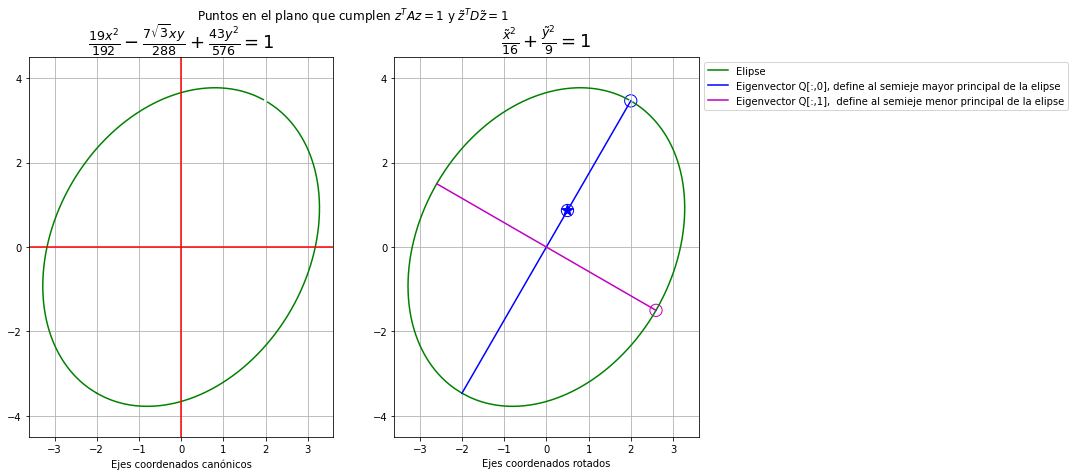

In [125]:
small_value = 1e-4
density=1e-2 + small_value
x=np.arange(-1/d1_inv,1/d1_inv,density)
y1=1/d2_inv*np.sqrt(1-(d1_inv*x)**2)
y2=-1/d2_inv*np.sqrt(1-(d1_inv*x)**2)
#transform
x_y1_hat = np.column_stack((x,y1))
x_y2_hat = np.column_stack((x,y2))
apply_evector_np_permuted = lambda vec : np.transpose(evector_np_permuted@np.transpose(vec))
evector_np_permuted_to_vector_1 = apply_evector_np_permuted(x_y1_hat)
evector_np_permuted_to_vector_2 = apply_evector_np_permuted(x_y2_hat)
fig = plt.figure(figsize=(12, 7))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
#first plot
ax1.plot(evector_np_permuted_to_vector_1[:,0],evector_np_permuted_to_vector_1[:,1],'g',
         evector_np_permuted_to_vector_2[:,0],evector_np_permuted_to_vector_2[:,1],'g')
ax1.set_title("$\\frac{19x^2}{192}-\\frac{7\\sqrt{3}xy}{288}+\\frac{43y^2}{576}=1$", fontsize=18)
ax1.set_xlabel("Ejes coordenados canónicos")
ax1.axhline(color='r')
ax1.axvline(color='r')
ax1.grid()
ax1.axis("equal")
#second plot
Evector_1 = np.row_stack((np.zeros(2), evector_1_rescaled))
Evector_2 = np.row_stack((np.zeros(2), evector_2_rescaled))
ax2.plot(evector_np_permuted_to_vector_1[:,0],evector_np_permuted_to_vector_1[:,1],
         color='g', label = "Elipse")
ax2.plot(evector_np_permuted_to_vector_2[:,0],evector_np_permuted_to_vector_2[:,1],
         color='g', label = "_nolegend_")
ax2.plot(Evector_1[:,0], Evector_1[:,1],
         color='b', label = "Eigenvector Q[:,0], define al semieje mayor principal de la elipse")
ax2.plot(-Evector_1[:,0], -Evector_1[:,1],
         color='b', label = "_nolegend_")
ax2.plot(Evector_2[:,0], Evector_2[:,1],
         color='m', label = "Eigenvector Q[:,1],  define al semieje menor principal de la elipse")
ax2.plot(-Evector_2[:,0], -Evector_2[:,1],
         color='m', label = "_nolegend_")
ax2.scatter(evector_np_permuted[0,0], 
            evector_np_permuted[1,0], marker = '*', color='b', s=150)
ax2.scatter(Q_np[0,0], Q_np[1,0], 
            marker='o', facecolors='none', edgecolors='b', 
            s=150)
ax2.scatter(evector_1_rescaled[0], evector_1_rescaled[1], 
            marker='o', facecolors='none', edgecolors='b', 
            s=150)
ax2.scatter(evector_2_rescaled[0], evector_2_rescaled[1], 
            marker='o', facecolors='none', edgecolors='m', 
            s=150)
ax2.set_title("$\\frac{\\tilde{x}^2}{16} + \\frac{\\tilde{y}^2}{9}=1$", fontsize=18)
ax2.set_xlabel("Ejes coordenados rotados")
ax2.legend(bbox_to_anchor=(1, 1))
fig.suptitle("Puntos en el plano que cumplen $z^TAz=1$ y $\\tilde{z}^TD\\tilde{z}=1$")
ax2.grid()
ax2.axis("equal")
plt.show()

```{margin}

Recuerda que $A = Q D Q^T$, $A$ es similar a $D$ matriz diagonal y $Q$ es ortogonal.

```

En la gráfica anterior se representa la rotación de los ejes coordenados definidos por los vectores canónicos $e_1, e_2$ y los rotados definidos por los eigenvectores de $A$. Los eigenvectores de $A$ están en las columnas de $Q$. La primera columna de $Q$ define al eje mayor principal de la elipse y la segunda columna al eje menor principal. La longitud de los semiejes están dados respectivamente por la raíz cuadrada de los recíprocos de los eigenvalores de $A$ que en este caso son: $\frac{1}{16}, \frac{1}{9}$, esto es: $4$ y $3$. Ver por ejemplo: [Principal_axis_theorem](https://en.wikipedia.org/wiki/Principal_axis_theorem), [Diagonalizable_matrix](https://en.wikipedia.org/wiki/Diagonalizable_matrix).

In [126]:
print(evector_1_rescaled)

[2.    3.464]


```{margin}

Longitud del eigenvector reescalado asociado al eigenvalor mínimo y representa la longitud del semieje mayor de la elipse.

```

In [127]:
print(np.linalg.norm(evector_1_rescaled))

4.0


In [128]:
print(evector_2_rescaled)

[ 2.598 -1.5  ]


```{margin}

Longitud del eigenvector reescalado asociado al eigenvalor máximo y representa la longitud del semieje menor de la elipse.

```

In [129]:
print(np.linalg.norm(evector_2_rescaled))

3.0000000000000004


```{admonition} Ejercicio
:class: tip

Utilizando lenguajes de programación, rotar los ejes coordenados $45^o$ en sentido contrario a las manecillas del reloj la ecuación de la elipse:

$$13x^2+10xy+13y^2=72$$

para representar tal ecuación alineando los ejes mayor y menor de la elipse a sus eigenvectores. Encontrar las matrices $Q, D$ tales que $A=QDQ^T$ con $Q$ ortogonal y $D$ diagonal. Realizar la gráfica de la elipse con los ejes coordenados canónicos y rotados.

```

## Algunos algoritmos para calcular eigenvalores y eigenvectores

Dependiendo de las siguientes preguntas es el tipo de algoritmo que se utiliza:

* ¿Se requiere el cómputo de todos los eigenvalores o de sólo algunos?

* ¿Se requiere el cómputo de únicamente los eigenvalores o también de los eigenvectores?

* ¿$A$ tiene entradas reales o complejas?

* ¿$A$ es de dimensión pequeña y es densa o grande y rala?

* ¿$A$ tiene una estructura especial o es una matriz general?

Para la última pregunta a continuación se tiene una tabla que resume las estructuras en las matrices que son relevantes para problemas del cálculo de eigenvalores-eigenvectores:

|Estructura|Definición|
|:---:|:---:|
|Simétrica|$A=A^T$|
|Ortogonal|$A^TA=AA^T=I_n$|
|Normal|$A^TA = AA^T$|

Ver {ref}`Ejemplos de matrices normales <EJMN>`.

```{margin}

Como ejemplo que no es posible expresar las raíces o ceros por una fórmula cerrada que involucren a los coeficientes, operaciones aritméticas y raíces $\sqrt[n]{\cdot}$ para polinomios de grado mayor a $4$, considérese las raíces de $x^5 - x^2 + 1 = 0$.

```

Además de considerar la estructura de la matriz se requiere de **métodos iterativos**: por definición, los eigenvalores de $A \in \mathbb{R}^{n \times n}$ son las raíces o ceros del polinomio característico $p(z)$ por lo que un método es calcularlas vía tal polinomio. Calcular los eigenvalores de matrices por tal método para una $n > 4$ necesariamente requiere un método iterativo para matrices con dimensión $n >4$ pues [Abel](https://en.wikipedia.org/wiki/Abel%E2%80%93Ruffini_theorem) probó de forma teórica que las raíces en general no son posibles expresarlas por una fórmula cerrada que involucren los coeficientes, operaciones aritméticas y raíces $\sqrt[n]{\cdot}$ .

(POLWILKINSON)=

### Una opción (inestable numéricamente respecto al redondeo): encontrar raíces del polinomio característico... 

```{margin}

Como ejemplo de este enunciado considérese:

$$A=\left[
\begin{array}{cc}
1 & \epsilon\\
\epsilon & 1\\
\end{array}
\right]
$$

cuyos eigenvalores son $1 + \epsilon$, $1 - \epsilon$ con $\epsilon$ menor que $\epsilon_{maq}$. Usando aritmética en el SPF se prueba que las raíces del polinomio característico es $1$ de multiplicidad $2$.
```

En ciertas bases de polinomios, por ejemplo $\{1, x, x^2, \dots, x^n\}$, los coeficientes de los polinomios  numéricamente no están bien determinados por los errores por redondeo y las raíces de los polinomios son muy sensibles a perturbaciones de los coeficientes, esto es, es un **problema mal condicionado**. Ver {ref}`condición de un problema y estabilidad de un algoritmo <CPEA>` y [Wilkinson's polynomial](https://en.wikipedia.org/wiki/Wilkinson%27s_polynomial) para un ejemplo.

### Alternativas

Revisaremos en la nota {ref}`Algoritmos y aplicaciones de eigenvalores, eigenvectores de una matriz <AAEVALEVEC>` algunos algoritmos como:

* Método de la potencia y método de la potencia inversa o iteración inversa.

* Iteración por el cociente de Rayleigh.

* Algoritmo QR.

* Método de rotaciones de Jacobi.

---

(EJMN)=

## Ejemplos de matrices normales

```{sidebar} Descomposición espectral para matrices normales

Las matrices normales generalizan al caso de entradas en $\mathbb{C}$ la diagonalización ortogonal al ser **unitariamente diagonalizables**. $A \in \mathbb{C}^{n \times n}$ es normal si y sólo si $A = U \Lambda U^H$ con $U$ matriz unitaria (generalización de una matriz ortogonal a entradas $\mathbb{C}$), $U^H$ la conjugada transpuesta de $U$ y $\Lambda$ matriz diagonal. Para $A \in \mathbb{R}^{n \times n}$ lo anterior se escribe como: $A$ es simétrica si y sólo si es ortogonalmente diagonalizable: $A = Q \Lambda Q^T$ (ver {ref}`descomposición espectral <DESCESP>`).

```

$$\begin{array}{l}
\left[
\begin{array}{cc}
1 &-2 \\
2 &1
\end{array}
\right],
\left[
\begin{array}{ccc}
1 &2 & 0\\
0 & 1 & 2\\
2 & 0 & 1
\end{array}
\right]
\end{array}
$$

Otro ejemplo: 

$$A = 
\left[
\begin{array}{ccc}
1 &1 & 0\\
0 & 1 & 1\\
1 & 0 & 1
\end{array}
\right]
$$

In [130]:
A = np.array([[1, 1, 0],
              [0, 1, 1],
              [1, 0, 1.0]])

In [131]:
print(A.T@A)

[[2. 1. 1.]
 [1. 2. 1.]
 [1. 1. 2.]]


```{margin}

Como $A$ es normal entonces se cumple que $AA^T=A^TA$.

```

In [132]:
print(A@A.T)

[[2. 1. 1.]
 [1. 2. 1.]
 [1. 1. 2.]]


In [133]:
evalue, evector = np.linalg.eig(A)

In [134]:
print('eigenvalores:')
print(evalue)

eigenvalores:
[0.5+0.866j 0.5-0.866j 2. +0.j   ]


```{margin}

Se verifica que los eigenvectores de este ejemplo forman un conjunto linealmente independiente pues $A$ es normal.

```

In [135]:
print('eigenvectores:')
print(evector)

eigenvectores:
[[-0.289+0.5j -0.289-0.5j -0.577+0.j ]
 [-0.289-0.5j -0.289+0.5j -0.577+0.j ]
 [ 0.577+0.j   0.577-0.j  -0.577+0.j ]]


```{margin}

Para una matriz normal $A$ se cumple que es unitariamente diagonalizable y $A = Q \Lambda Q^H$ donde: $Q^H$ es la conjugada transpuesta de $Q$.

```

In [136]:
print('descomposición espectral:')
Lambda = np.diag(evalue)
Q = evector


descomposición espectral:


In [137]:
print('QLambdaQ^H:')
print(Q@Lambda@Q.conjugate().T)


QLambdaQ^H:
[[ 1.+0.j  1.+0.j -0.+0.j]
 [ 0.+0.j  1.-0.j  1.-0.j]
 [ 1.-0.j -0.-0.j  1.+0.j]]


In [138]:
print(A)

[[1. 1. 0.]
 [0. 1. 1.]
 [1. 0. 1.]]


```{margin}

Observa que $Q^HQ=QQ^H = I_3$ donde: $Q^H$ es la conjugada transpuesta de $Q$.
```

In [139]:
print(Q.conjugate().T@Q)

[[1.+0.j 0.-0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.-0.j]
 [0.-0.j 0.+0.j 1.+0.j]]


```{admonition} Observación
:class: tip

El problema del cálculo de eigenvalores para matrices normales es bien condicionado.

```

```{admonition} Ejercicios
:class: tip

1.Resuelve los ejercicios y preguntas de la nota.
```


**Preguntas de comprehensión:**

1)¿Qué son los eigenvalores de una matriz y qué nombre recibe el conjunto de eigenvalores de una matriz?

2)¿Cuántos eigenvalores como máximo puede tener una matriz?

3)¿Qué característica geométrica tiene multiplicar una matriz por su eigenvector?

4)¿A qué se le nombra matriz diagonalizable o *non defective*?

5)¿Cuál es el número de condición del problema de cálculo de eigenvalores con multiplicidad simple para una matriz simétrica?

6)¿Verdadero o Falso? 

a.Una matriz es diagonalizable entonces tiene eigenvalores distintos.

b.Una matriz con eigenvalores distintos es diagonalizable.

c.Si $A=XDX^{-1}$ con $X$ matriz invertible entonces en la diagonal de $D$ y en las columnas de $X$ encontramos eigenvalores y eigenvectores derechos de $A$ respectivamente.

7)Describe la descomposición espectral de una matriz simétrica.

8)¿Qué característica tienen las matrices similares?

**Referencias:**

1. M. T. Heath, Scientific Computing. An Introductory Survey, McGraw-Hill, 2002.

2.  G. H. Golub, C. F. Van Loan, Matrix Computations, John Hopkins University Press, 2013.

3. L. Trefethen, D. Bau, Numerical linear algebra, SIAM, 1997.

4. C. Meyer, Matrix Analysis and Applied Linear Algebra, SIAM, 2000.